# Spam or Ham Problem Solution

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_recall_fscore_support as score
from sklearn.linear_model import LogisticRegression

### Loading data from .csv file to pandas dataframe

In [2]:
messagesDF=pd.read_csv('SMSSpamCollection.csv',sep='\t')
messagesDF.head()

,label,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Exploring Data info

In [3]:
messagesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label    5572 non-null object
msg      5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


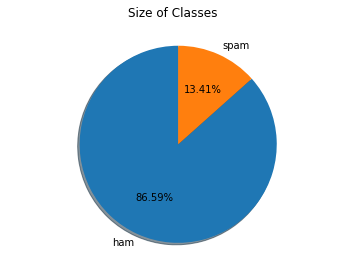

In [4]:
labels = set(messagesDF.label.values)
sizes = messagesDF.label.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.2f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

fig1.suptitle('Size of Classes')
plt.show()


### Mapping messages labels with numeric labels 

In [5]:
messagesDF['tempLabel'] = messagesDF.label.map({'ham':0, 'spam':1})
messagesDF['label']=messagesDF['tempLabel']
messagesDF.drop(axis=1,columns=['tempLabel'],inplace=True)
messagesDF.head()

,label,msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Splitting dataset to training and testing (%75 , %25) with random state (1)

In [6]:
#split data to training & testing
X_train, X_test, y_train, y_test = train_test_split(messagesDF.msg, messagesDF.label, test_size=0.25, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4179,) (4179,)
(1393,) (1393,)


### Using TF-IDF Vectorizer to transform text messages into numerical vectors

In [7]:
#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(use_idf=False,lowercase=True, stop_words=None,ngram_range=(1,1))

tfidf_matrix = tfidf_vectorizer.fit_transform(X_train) #fit the vectorizer to synopses

#transform messages using victorizer
X_train_vect = tfidf_vectorizer.transform(X_train)
X_test_vect = tfidf_vectorizer.transform(X_test)

### Train logistic regression algorithm with messages

In [8]:
#Logistic Regression
clf = LogisticRegression()
clf.fit(X_train_vect,y_train)
predicted=clf.predict(X_test_vect)

precision, recall, fscore, support = score(y_test, predicted, average='micro')

print('Measure      | Percentage')
print('_'*35)
print('F-1 Score    | {}'.format(fscore.mean()*100))
    


Measure      | Percentage
___________________________________
F-1 Score    | 97.63101220387652
